In [80]:
import cvxpy as cp
import math
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [27]:
home = raw_input("Which Home?")
file_path = 'Year1/Home' + home + '_yr1.csv'

Which Home?1


In [28]:
#print(file_path)
dft = pd.read_csv(file_path, names=['Actual'])
#print(dft.head())
intervals = pd.date_range(start='12/1/2014', end='12/1/2015', freq='15min', closed=None)[0:-1]
dft.insert(0, 'Timestamp', intervals)
dft = dft.set_index('Timestamp')

#print(dft.index)
#print(dft['2014-12-1 00:00:00':])

In [29]:
year = raw_input("Enter the Year:")
month = raw_input("Enter the Month:")
date = raw_input("Enter the Date:")
hour = raw_input("Enter the Hour:")
minute = raw_input("Enter the Minute:")
date1 = datetime(int(year), int(month), int(date), int(hour), int(minute) , 0)
print(date1)

Enter the Year:2015
Enter the Month:11
Enter the Date:8
Enter the Hour:0
Enter the Minute:0
2015-11-08 00:00:00


In [30]:
# Find the end interval after 1 day
training_start_date = date1 - timedelta(days=7)
print(training_start_date)
print(date1)
end_dt = date1 + timedelta(days=1) - timedelta(minutes=15)
print(end_dt)
dataset = dft[training_start_date: date1 - timedelta(minutes=15)]

type(dataset['Actual'])

print(dataset['Actual'])

2015-11-01 00:00:00
2015-11-08 00:00:00
2015-11-08 23:45:00
Timestamp
2015-11-01 00:00:00    1.16200
2015-11-01 00:15:00    1.27070
2015-11-01 00:30:00    0.65210
2015-11-01 00:45:00    1.22880
2015-11-01 01:00:00    0.83707
2015-11-01 01:15:00    0.99290
2015-11-01 01:30:00    1.06410
2015-11-01 01:45:00    1.01790
2015-11-01 02:00:00    1.27610
2015-11-01 02:15:00    0.57318
2015-11-01 02:30:00    1.15700
2015-11-01 02:45:00    1.32680
2015-11-01 03:00:00    0.57308
2015-11-01 03:15:00    1.35390
2015-11-01 03:30:00    1.31850
2015-11-01 03:45:00    0.71527
2015-11-01 04:00:00    3.07300
2015-11-01 04:15:00    0.90890
2015-11-01 04:30:00    1.16540
2015-11-01 04:45:00    1.34300
2015-11-01 05:00:00    0.52623
2015-11-01 05:15:00    1.37700
2015-11-01 05:30:00    0.57932
2015-11-01 05:45:00    1.29150
2015-11-01 06:00:00    1.28270
2015-11-01 06:15:00    0.57947
2015-11-01 06:30:00    1.43490
2015-11-01 06:45:00    1.20180
2015-11-01 07:00:00    0.70401
2015-11-01 07:15:00    1.22280


In [31]:
#Offline Dynamic 
p = 0.1
a = 1
# use the y as directly from the house values
y = dataset['Actual'].tolist()
x = cp.Variable(672)
sum = 0

for i in range(1,672):
    sum += (cp.multiply(p,x[i]) + cp.maximum(0, y[i]-x[i]) + cp.abs(x[i] - x[i-1]))
    
objective = (cp.Minimize(sum))
constraints = [0 <= x]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
print(result)
# The optimal value for x is stored in `x.value`.
print(x.value)

# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
#print(constraints[0].dual_value)

196.90778135242692
[1.29738135 1.29738108 1.29738025 1.29737888 1.29737702 1.2973747
 1.29737199 1.29736895 1.29736568 1.29736226 1.29735882 1.32684463
 1.32685165 1.35386455 1.35386125 1.3538587  1.39099121 1.39098922
 1.39098701 1.39098456 1.39098182 1.39097875 1.3909753  1.39097145
 1.39096718 1.39096249 1.43509907 1.43514229 1.4351819  1.43521731
 1.43524795 1.43527335 1.97254866 1.97250768 1.9724716  1.97244104
 1.97241655 1.9723986  1.9723875  1.97238351 1.9739609  2.9121294
 2.91194794 2.91171525 2.91143523 2.91111257 2.9107527  2.91036164
 2.90994593 2.90951254 2.90906869 2.90862175 2.90817915 2.9077482
 2.90733599 2.90694929 2.9065944  2.90627709 2.90600248 2.90577498
 2.90559819 2.99184476 2.99187884 2.99190524 2.991924   2.99193522
 2.991939   2.99193545 3.38535471 3.38533148 3.38529598 3.38524849
 3.3851894  3.38511915 3.38503826 3.38494733 3.38484702 3.38473807
 3.38462126 3.3846813  2.62193916 2.62200947 2.62209679 2.62219977
 2.6223168  2.62244601 0.67673379 0.67670013 0

In [69]:
#Offline static

p = 0.1
a = 1
# use the y as directly from the house values
y = dataset['Actual'].tolist()
x = cp.Variable(672)

equation = p*x + a*(cp.maximum(0,y-x))
objective = cp.Minimize(cp.sum(equation))
constraints = [0 <= x]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
print(result)
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
#print(constraints[0].dual_value)

71.14318760000002
[1.162    1.2707   0.6521   1.2288   0.83707  0.9929   1.0641   1.0179
 1.2761   0.57318  1.157    1.3268   0.57308  1.3539   1.3185   0.71527
 3.073    0.9089   1.1654   1.343    0.52623  1.377    0.57932  1.2915
 1.2827   0.57947  1.4349   1.2018   0.70401  1.2228   1.4201   0.66615
 1.9728   0.60645  0.67536  1.2328   1.084    1.868    1.3508   0.77947
 1.9745   3.7043   0.81288  1.2718   1.2348   1.0295   1.4376   0.79793
 1.2804   1.7818   3.9348   1.6702   1.4538   1.5916   1.5587   2.8566
 0.89841  2.3705   0.73691  0.77128  2.1107   2.9912   0.66459  0.43532
 0.34864  0.62942  0.514    0.58552  3.8796   0.70218  2.9555   3.3787
 6.3582   1.6213   0.66265  0.66548  0.55568  0.68982  3.3839   4.6636
 0.61975  0.44291  0.74291  0.51534  0.69445  2.6231   0.57427  0.55883
 0.62702  0.46078  0.6786   0.3853   0.62347  0.62868  0.5798   0.65618
 0.59971  0.58339  0.67095  0.58097  0.60287  0.64961  0.58256  0.60593
 0.64915  0.58033  0.59216  0.73788  0.58209  0.581

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
# find the optimal set of parameters that yields the best performance for our model
# Choose the one with the least resulting AIC value
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataset,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2383.83834068
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2204.15093221
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2249.70381889
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1830.11100556
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2103.37380136
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1854.53588669
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2067.76647361
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1832.11109108
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2131.05845555
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2048.70367177
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2206.1887508
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1764.47714021
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2011.82846727
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1792.29346329
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2007.22460714
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1776.66497838
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2029.24368467
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2001.87922969
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2481.64853731
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 -

In [36]:
pdq = [1, 1, 1, 1, 0, 0, 1]
print(pdq)

[1, 1, 1, 1, 0, 0, 1]


In [37]:
mod = sm.tsa.statespace.SARIMAX(dft,
                                order=(pdq[1], pdq[2], pdq[3]),
                                seasonal_order=(pdq[4], pdq[5], pdq[6], 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2762      0.004     61.742      0.000       0.267       0.285
ma.L1         -0.8835      0.002   -357.512      0.000      -0.888      -0.879
ma.S.L12      -0.0026      0.004     -0.591      0.554      -0.011       0.006
sigma2         1.0273      0.004    250.460      0.000       1.019       1.035


In [38]:
# Forecasting
pred = results.get_prediction(start=date1, end=end_dt, dynamic=False)
arima_pred_list = pred.predicted_mean.values.tolist()
y_pred_1 = np.asarray(arima_pred_list)

In [39]:
print(y_pred_1)

[1.1573016  1.29811064 2.18018964 1.12275054 1.3263004  1.09542209
 1.19789004 1.03755216 1.2257553  0.96326974 1.15829879 0.9142792
 1.09960694 0.99720553 1.11167141 0.90400391 1.09542052 0.85308744
 0.85033493 0.79032298 0.77283263 0.76487693 0.72221837 0.71241942
 0.70954429 0.67420908 0.67529629 0.67365532 0.6461977  0.64489299
 0.652116   0.62395361 0.62243448 0.63586098 0.60753867 0.60178232
 0.63006701 0.5968129  0.5899696  0.69628774 0.61498822 0.82233081
 1.01829996 0.96133051 0.78371891 0.884661   1.74187851 2.47120002
 4.3649929  3.25972071 2.65095887 2.27886764 2.63650339 2.38549245
 2.17881534 1.63734636 1.72802857 2.17178329 1.66337684 1.43494368
 1.22556778 1.91014269 1.43797604 1.09389093 1.73858632 1.58286943
 1.05453289 1.40050584 2.01069294 2.60357181 2.13745878 2.71527095
 2.80154476 2.42973037 3.21954785 2.69858374 2.10809608 2.32409294
 2.21589171 1.67650069 3.30253123 3.51992983 3.0297786  2.12249936
 2.85335231 2.48124896 1.94958373 1.83725407 2.27036476 2.27683

In [40]:
print(file_path)
df = pd.read_csv(file_path, names=['Consumption'])
#print(df)
def datetime_range(start, end, delta):
    end += 4*delta
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt for dt in 
       datetime_range(datetime(2014, 12, 1, 0), datetime(2015, 11 , 30 , 23), 
       timedelta(minutes=15))]
df['date/time'] = dts

Year1/Home1_yr1.csv


In [41]:
for i, row in df.iterrows():
#handling seasons
    df.at[i, 'Year'] = row[1].year
    df.at[i, 'Date'] = row[1].day
    df.at[i, 'Month'] = row[1].month
    df.at[i, 'Hour'] = row[1].hour
    df.at[i, 'Minute'] = row[1].minute
    if row[1].month in range(1,4) :
        df.at[i, 'Summer'] = 1
    elif row[1].month in range(4,7):
        df.at[i, 'Spring'] = 1
    elif row[1].month in range(7,10):
        df.at[i, 'Fall'] = 1
    elif row[1].month in range(10,13):
        df.at[i, 'Winter'] = 1
        
#handling peak hours   
    if row[1].hour in [0,1,2,3,4,5,6,7,20,21,22,23]:
        df.at[i, 'Peak Hour'] = 1
    else:
        df.at[i, 'Peak Hour'] = 0
        
#handling holidays & weekends
    if row[1].weekday() in [5,6] :
        df.at[i, 'Holiday'] = 1
    elif row[1].month == 10 and row[1].day == 2:
        df.at[i, 'Holiday'] = 1
    elif row[1].month == 1 and row[1].day == 26:
        df.at[i, 'Holiday'] = 1
    else:
        df.at[i, 'Holiday'] = 0

df['Spring'].fillna(0,inplace=True)
df['Fall'].fillna(0,inplace=True)
df['Summer'].fillna(0,inplace=True)
df['Winter'].fillna(0,inplace=True)

In [42]:
for i, row in df.iterrows():
    if row[1] == date1:
        break
x_train = df[['Year','Date','Month','Hour','Minute','Summer','Winter', 'Fall','Spring' , 'Holiday', 'Peak Hour']][i-672:i]
y_train = df[['Consumption']][i-672:i]
x_test = df[['Year','Date','Month','Hour','Minute','Summer','Winter', 'Fall','Spring' , 'Holiday', 'Peak Hour']] [i:96+i]
y_test = df[['Consumption']][i:96+i]

Mean absolute error LR: 0.811448523


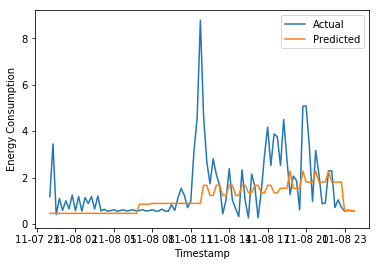

In [50]:
regr = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
regr.fit(x_train, y_train)
y_pred_2 = regr.predict(x_test)
print("Mean absolute error LR: %.9f"
      % mean_absolute_error(y_test,y_pred_2))
dur = [dt for dt in 
       datetime_range(datetime(int(year), int(month), int(date), int(hour), int(minute)), datetime(2015, 12 , 31 , 23), 
       timedelta(minutes=15))]
dur = dur[0:96]
plt.plot(dur, y_test, label="Actual")
plt.plot(dur, y_pred_2, label="Predicted")
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [52]:
# def df(y , prev_x):
#     if y > prev_x:
#         return 0.4
#     else:
#         return 0.4 + 4

In [53]:
# result = []
# for y in y_pred_1:
#     print(y)
#     cur_x = 3 # The algorithm starts at x=3
#     rate = 0.01 # Learning rate
#     precision = 0.000001 #This tells us when to stop the algorithm
#     previous_step_size = 1 #
#     max_iters = 10000 # maximum number of iterations
#     iters = 0 #iteration counter
# #     df = lambda x: 2*(x+5)
    
#     while previous_step_size > precision and iters < max_iters:
#         prev_x = cur_x #Store current x value in prev_x
        
#         cur_x = cur_x - rate * df(y, prev_x) #Grad descent
#         previous_step_size = abs(cur_x - prev_x) #Change in x
#         iters = iters+1 #iteration count
#         #print("Iteration",iters,"\nX value is",cur_x) #Print iterations
#     #print(iters)
#     print(cur_x)


1.157301602319643
-38.68
1.2981106410792034
-38.56
2.1801896448910263
-37.76
1.1227505355471503
-38.72
1.3263003986474522
-38.56
1.095422088830289
-38.76
1.1978900436183484
-38.64
1.0375521636529097
-38.8
1.2257553029705053
-38.64
0.9632697411452331
-38.88
1.1582987857919134
-38.68
0.91427919883513
-38.92
1.0996069376032838
-38.76
0.997205532322102
-38.84
1.1116714111975943
-38.72
0.9040039110737432
-38.92
1.0954205201416947
-38.76
0.8530874370629155
-38.96
0.850334929901504
-38.96
0.7903229788999726
-39.04
0.7728326283519652
-39.04
0.764876933771825
-39.04
0.7222183650913633
-39.08
0.7124194162881581
-39.08
0.7095442875105445
-39.12
0.6742090812387485
-39.12
0.6752962910558021
-39.12
0.6736553221254623
-39.12
0.6461976961368743
-39.16
0.6448929897402481
-39.16
0.6521160002308358
-39.16
0.6239536146169956
-39.2
0.6224344805239574
-39.2
0.6358609766601392
-39.16
0.6075386678448176
-39.2
0.6017823183333142
-39.2
0.6300670070959228
-39.16
0.5968129014190159
-39.2
0.5899696010285449
-39.2


In [92]:
#online gradient descent

a = 1
b = 1
p = 0.1

c = 0.001
def eta(i):
    return c/math.sqrt(i)

def df1(y , x):
    if y > x:
        return p - a + b
    else:
        return p + b

x = [0]

for i in range(1,672):
    x.append(x[i-1] + (eta(i) * df1(y[i-1], x[i-1])))
  
cost = 0
for i in range(0,len(x)):
    cost += p*x[i] + a*max(0, y[i] - x[i]) + b* abs(x[i] - x[i-1])
print(cost)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27